In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv("../data/bank_data.csv")

In [3]:
raw_data.head()

,Unnamed: 0,duration,y
0,0,117,no
1,1,274,yes
2,2,167,no
3,3,686,yes
4,4,157,no


In [4]:
data = raw_data.copy()

In [5]:
data = data.drop(["Unnamed: 0"], axis=1)

In [6]:
data["y"] = data["y"].map({"yes": 1, "no": 0})
data

,duration,y
0,117,0
1,274,1
2,167,0
3,686,1
4,157,0
...,...,...
513,204,0
514,806,1
515,290,0
516,473,1


In [9]:
y = data["y"]
x1 = data["duration"]

In [10]:
X = sm.add_constant(x1)
reg_log = sm.Logit(y, X)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [11]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Jul 2025   Pseudo R-squ.:                  0.2121
Time:                        11:02:12   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

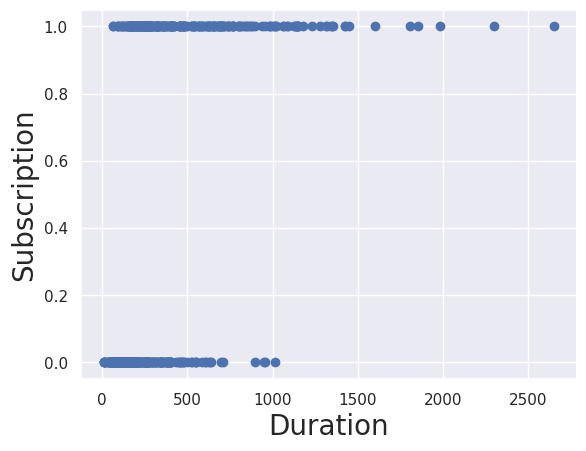

In [12]:
plt.scatter(x1,y,color = 'C0')

plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()